In [1]:
from read_mem import *
import matplotlib.pyplot as plt
import pathlib
from parse import parse
from scipy.optimize import curve_fit

In [2]:
def func(x, a, b,):

    return a * x + b

Total number of log files 19
/home/bastian/D1/registration/cubeslurm/439294_log_python_srun.txt E100A0.01LBFGS30copy {1: '1', 2: '1', 3: '1', 4: '0', 5: '0', 6: '0', 7: '0', 8: '0', 9: '0', 10: '0'}
/home/bastian/D1/registration/cubeslurm/439295_log_python_srun.txt E100A0.01LBFGS30copy {1: '1', 2: '1', 3: '1', 4: '0', 5: '0', 6: '0', 7: '0', 8: '0', 9: '0'}
/home/bastian/D1/registration/cubeslurm/439296_log_python_srun.txt E100A0.01LBFGS30copy {1: '1', 2: '1', 3: '1', 4: '0', 5: '0', 6: '0', 7: '1', 8: '1', 9: '0', 10: '0'}
/home/bastian/D1/registration/cubeslurm/439297_log_python_srun.txt E100A0.01LBFGS30copy {1: '1', 2: '1', 3: '1', 4: '0', 5: '0', 6: '0', 7: '1', 8: '1', 9: '1'}
/home/bastian/D1/registration/cubeslurm/439298_log_python_srun.txt E100A0.01LBFGS30nocopy {1: '1', 2: '1', 3: '1', 4: '0', 5: '0', 6: '0', 7: '1', 8: '1', 9: '1'}
/home/bastian/D1/registration/cubeslurm/439299_log_python_srun.txt E100A0.01LBFGS30nocopy {1: '1', 2: '1', 3: '1', 4: '0', 5: '0', 6: '0', 7: '1',

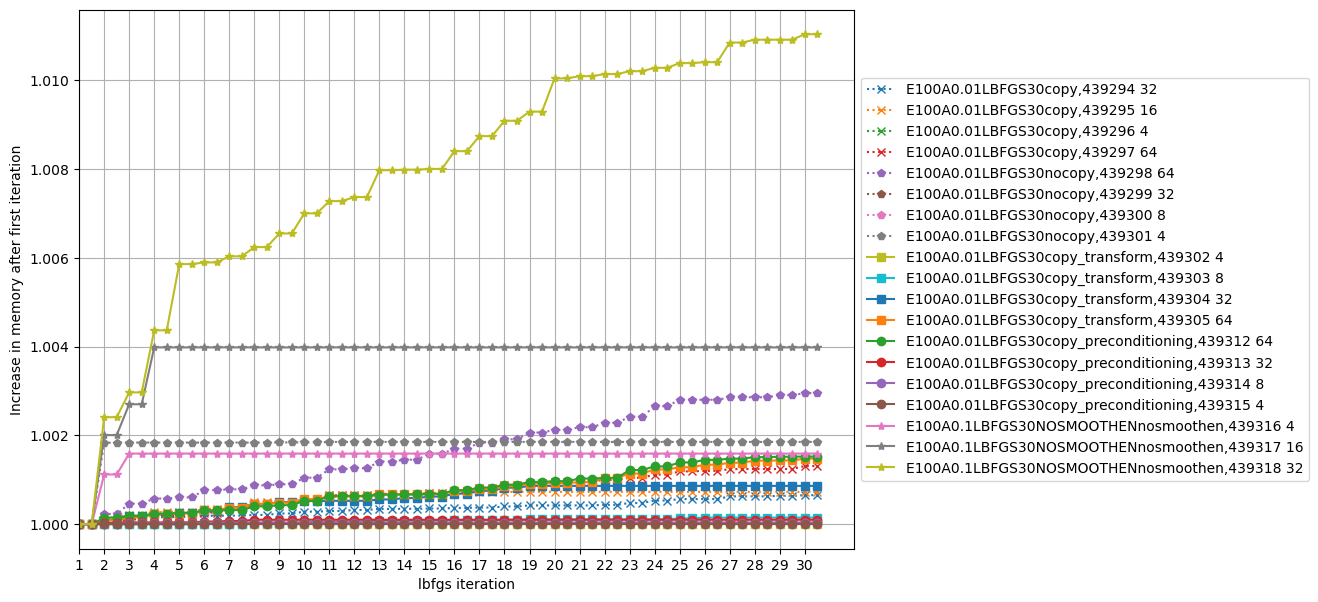

In [3]:
# filenames = ["/home/bastian/D1/registration/mrislurm/436844_log_python_srun.txt"]


# path = pathlib.Path("/home/bastian/D1/registration/cubeslurm/")
# # slurmids = list(range(437522, 437526))
# # slurmids = list(range(437534, 437543))
# # slurmids.remove(437537)
# slurmids = list(range(437543, 437559))
# slurmids.remove(437547)

# slurmids += list(range(437573, 437576))
# slurmids += list(range(437579, 437585))
# slurmids += list(range(437579, 437588))
# slurmids += list(range(437590, 437591))

# slurmids.remove(437585)
# slurmids.remove(437586)

# slurmids = set(slurmids)

# slurmids = [# 437606, 
#             437649, 437650, 437653, 437657, 437707, 437711, 437712]

# slurmids = [437738, 437739, 437740, 437762, 437768,437771,]


path = pathlib.Path("/home/bastian/D1/registration/mrislurm/")
slurmids = [# 437776, 437782, 437847, 
            # 437912, 437913, 437915,437918,437919,437920,437921,
            #437783, 437866
            438008, 438009, # 438153, 
            437866, # is the job on habaq
            438502, 438462,
            438887, # is the job with no resacling
                        439198, # is the job on milanq

            ]

path = pathlib.Path("/home/bastian/D1/registration/cubeslurm/")
slurmids = [
            # 438207, 438208, 438210, 438211, 438212, 438214, 438215, 438216,
            # 438217, 438218, 438219, 438220, 438224,
            # 438294,438293, 438296, 438299, 438301,  438302, 438304, 438306, 438307, 438308,
            # 439209, 439210, 439213, 439214, 439215, 439217, 439293
            ]


slurmids += list(range(439294, 439306))

slurmids += list(range(439312, 439316))

slurmids += list(range(439316, 439319))

mem0 = []


print("Total number of log files", len(slurmids))

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

colors = {1: "darkblue", 2: "blue", 4:"deepskyblue", 8:"slategrey", 10: "k"}

for slurmid in slurmids:

    filename = path / (str(slurmid) + "_log_python_srun.txt")

    mema, outfoldername, line_searches = read_memory(filename)
    check_for_error(path / (str(slurmid) + ".out"))
    check(filename)#path / (str(slurmid) + ".out"))

    ntasks = None
    ntasks, maxcor, meshn = read(path / (str(slurmid) + ".out"))

    outfoldername = outfoldername.replace("\n", "").replace(" ", "")
    
    print(filename, outfoldername, line_searches)
    try:
        mema[:,0]
        # print(mema[:, 0])
    except IndexError:
        print(outfoldername, "probably still running init? Continue.")
        continue

    marker = "o"
    linestyle = "-"

    fac = 1
    fac = mema[0,1]

    # popt, pcov = curve_fit(func, mema[:,0], mema[:,1])
    # print(slurmid, "linear slope=", popt[1])

    label = outfoldername + "," + str(slurmid)

    if ntasks is not None:
        label += str(ntasks).replace("\n", "")

    color = None

    if slurmid >= 439294:
        linestyle = ":"
        marker = "x"

    if "copy_transform" in label:
        linestyle = "-"
        marker = "s"

    if "copy_preconditioning" in label:
        linestyle = "-"
        marker = "o"
    if "nosmoothen" in label:
        linestyle = "-"
        marker="*"

    if "nocopy" in label:
        linestyle = ":"
        marker="p"

    plt.plot(mema[:,0], mema[:,1] / fac, marker=marker, linestyle=linestyle, color=color,
            label=label,
            )
    plt.legend()

    mem0.append(mema[-1,1] / mema[0,1])

plt.xlabel("lbfgs iteration")
if fac == 1:
    plt.ylabel("memory (TB)")
else:    
    plt.ylabel("Increase in memory after first iteration")
plt.xlim(1, None)
plt.xticks(list(range(1, int(plt.gca().get_xlim()[1]))))
# plt.yticks([1 + x /1000 for x in range(0, 22, 2)])
plt.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print(format(np.mean(mem0),".2e"), "+-", format(np.std(mem0), ".2e"))
plt.show()